1- Level of education coding. 

- 9 = grade school, 
- 12 = high school graduate, 
- 14 = some college, 
- 16 = college graduate, 
- 17 = some graduate work, 
- 18 = master's degree, 
- 20 = Ph.D., M.D., or other advanced degree.

2 - Occupation according to Hollingshead classification (reverse numbering)

Approach 1:

Keep the data as it is (numeric ranges) and then normalize it or standardize it

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf

In [2]:
df = pd.read_csv('Affairs.csv')
df.drop('Unnamed: 9', axis = 1, inplace=True)

In [3]:
## Since the dataset is unbalanced, we have 451 extramarital_affairs == 0 in a dataset of 600 records.
## So, here I will remove 400 records and keep only 50 records with extramarital_affairs == 0

# Store the records with extramarital_affairs > 0
label_greater_than_0 = df[df['extramarital_affairs'] > 0]

# Store the records with extramarital_affairs == 0
label_equal_to_0 = df[df['extramarital_affairs'] == 0]
print(f"Equal to 0: {label_equal_to_0.shape}, Greater than 0: {label_greater_than_0.shape}")


# Randomly shuffle the records of the dataframe with labels == 0 and store them. (I'm keeping only 50 records with label_equal_to_0 to keef df balanced)
label_equal_to_0 = label_equal_to_0.sample(frac=1)
label_equal_to_0.reset_index(inplace=True)
label_equal_to_0 = label_equal_to_0.loc[:50, :]
print(f"Equal to 0: {label_equal_to_0.shape}")

Equal to 0: (451, 9), Greater than 0: (150, 9)
Equal to 0: (51, 10)


In [4]:
# Create new dataframe of 200 records
df = pd.concat([label_greater_than_0, label_equal_to_0], ignore_index=True, axis=0)
df.drop('index', axis=1, inplace=True)
df

,extramarital_affairs,gender,age,yearsmarried,children,religiousness_level,education,occupation,self_rating_of_marriage
0,3,male,27.0,1.500,no,3,18,4,4
1,3,female,27.0,4.000,yes,3,17,1,5
2,7,male,37.0,15.000,yes,5,18,6,2
3,12,female,32.0,10.000,yes,3,17,5,2
4,1,male,22.0,0.125,no,4,16,5,5
...,...,...,...,...,...,...,...,...,...
196,0,female,37.0,15.000,yes,2,17,5,5
197,0,male,22.0,0.125,no,1,16,3,5
198,0,male,22.0,4.000,no,5,12,4,5
199,0,female,52.0,15.000,yes,5,12,1,3


In [5]:
# Change binary categorical data into numeric
df['gender'] = df['gender'].map({'male': 0.0, 'female': 1.0})
df['children'] = df['children'].map({'no': 0.0, 'yes': 1.0})
df

,extramarital_affairs,gender,age,yearsmarried,children,religiousness_level,education,occupation,self_rating_of_marriage
0,3,0.0,27.0,1.500,0.0,3,18,4,4
1,3,1.0,27.0,4.000,1.0,3,17,1,5
2,7,0.0,37.0,15.000,1.0,5,18,6,2
3,12,1.0,32.0,10.000,1.0,3,17,5,2
4,1,0.0,22.0,0.125,0.0,4,16,5,5
...,...,...,...,...,...,...,...,...,...
196,0,1.0,37.0,15.000,1.0,2,17,5,5
197,0,0.0,22.0,0.125,0.0,1,16,3,5
198,0,0.0,22.0,4.000,0.0,5,12,4,5
199,0,1.0,52.0,15.000,1.0,5,12,1,3


extramarital_affairs
0     51
7     42
12    38
1     34
3     19
2     17
Name: count, dtype: int64


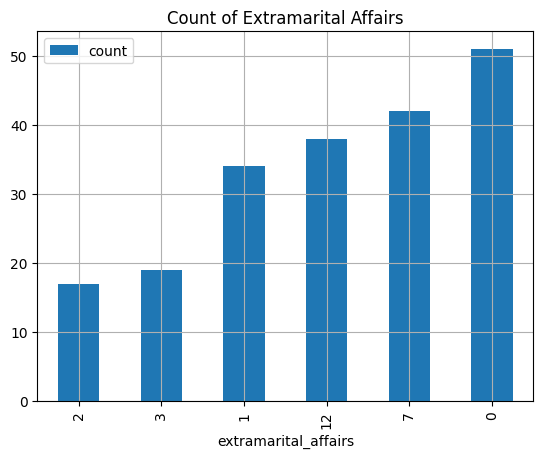

In [6]:
# Visualize extramarital_affairs
affairs = df['extramarital_affairs'].value_counts()
print(affairs)

affairs.sort_values(ascending=True, inplace=True)
affairs.plot(kind='bar', grid=True, legend=True, title='Count of Extramarital Affairs')

plt.show()

<Axes: title={'center': 'Count of each number of Affairs per Age'}, xlabel='Affairs', ylabel='Count'>

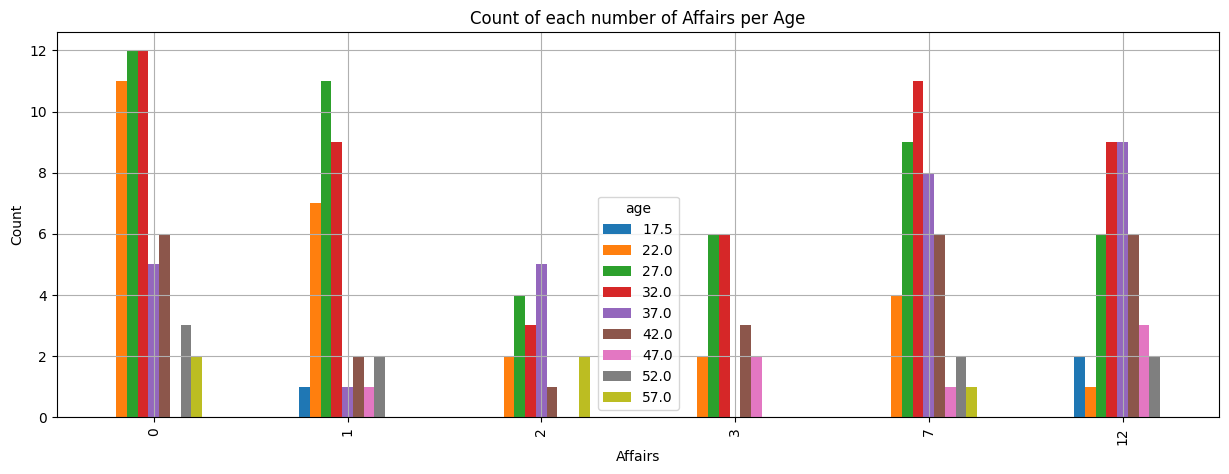

In [7]:
# Visualize affairs by age
age_vs_affairs= pd.crosstab(index = df['extramarital_affairs'], columns = df['age'])
age_vs_affairs.plot(kind='bar', figsize=(15,5), xlabel='Affairs', ylabel='Count', grid=True, title='Count of each number of Affairs per Age')

<Axes: title={'center': 'Count of each number of Affairs vs Rating of Marriage'}, xlabel='Affairs', ylabel='Count'>

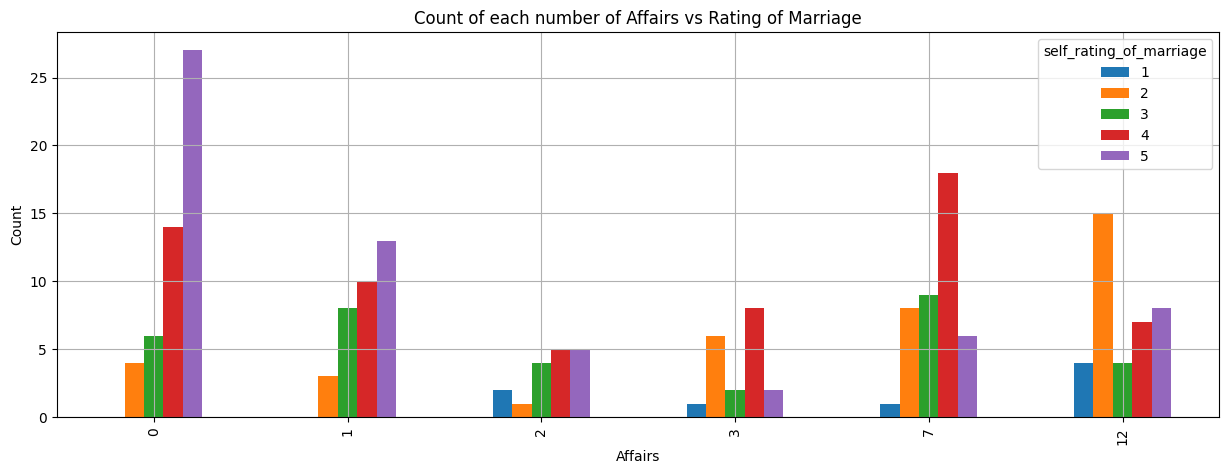

In [8]:
# Visualize affairs by rating
age_vs_affairs= pd.crosstab(index = df['extramarital_affairs'], columns = df['self_rating_of_marriage'])
age_vs_affairs.plot(kind='bar', figsize=(15,5), xlabel='Affairs', ylabel='Count', grid=True, title='Count of each number of Affairs vs Rating of Marriage')

<Axes: title={'center': 'Count of each number of Affairs per Educational Level'}, xlabel='Affairs', ylabel='Count'>

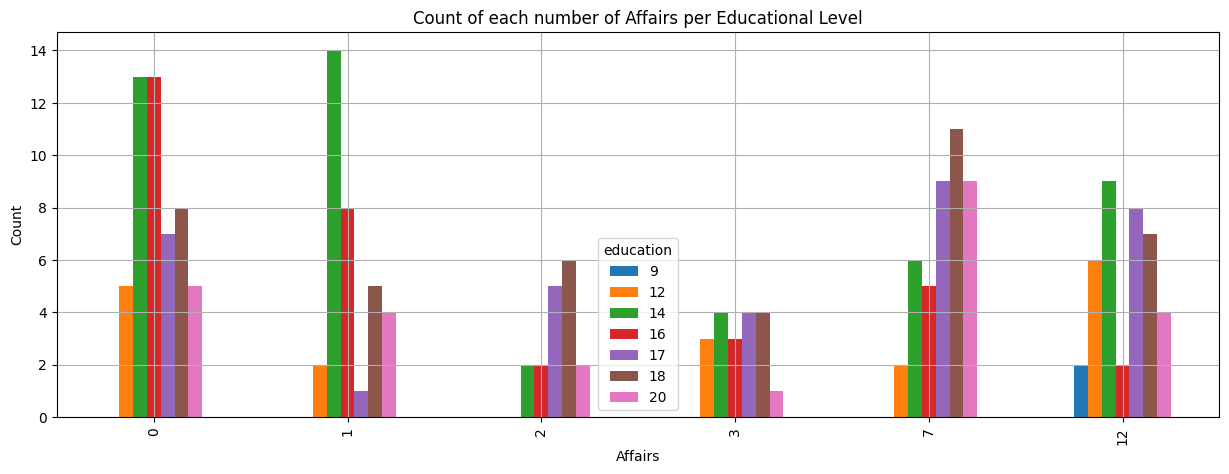

In [9]:
# Visualize affairs by education
age_vs_affairs= pd.crosstab(index = df['extramarital_affairs'], columns = df['education'])
age_vs_affairs.plot(kind='bar', figsize=(15,5), xlabel='Affairs', ylabel='Count', grid=True, title='Count of each number of Affairs per Educational Level')

<Axes: title={'center': 'Count of each number of Affairs vs Having Children'}, xlabel='Affairs', ylabel='Count'>

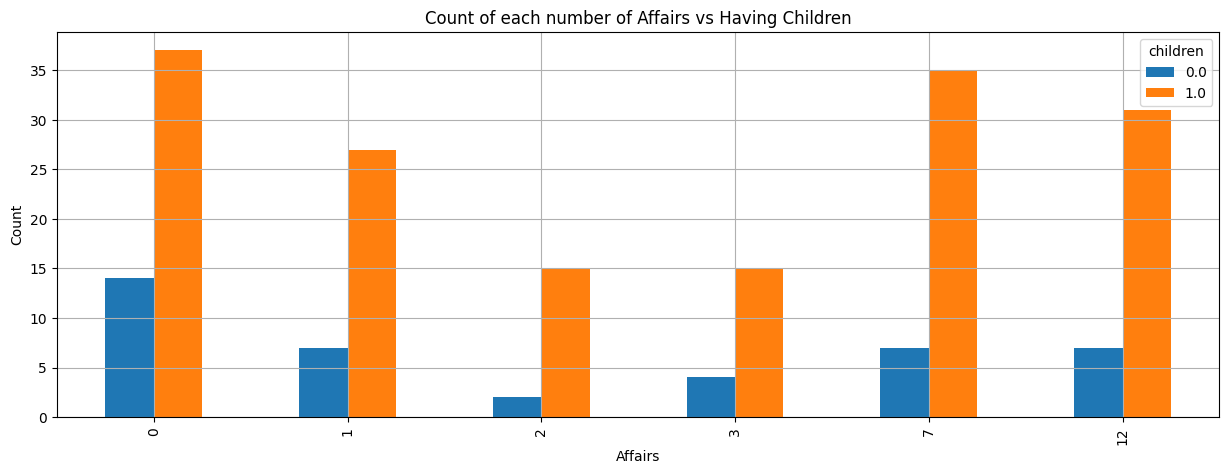

In [10]:
# Visualize affairs by children
age_vs_affairs= pd.crosstab(index = df['extramarital_affairs'], columns = df['children'])
age_vs_affairs.plot(kind='bar', figsize=(15,5), xlabel='Affairs', ylabel='Count', grid=True, title='Count of each number of Affairs vs Having Children')

<Axes: title={'center': 'Count of each number of Affairs per Years of Marriage'}, xlabel='Affairs', ylabel='Count'>

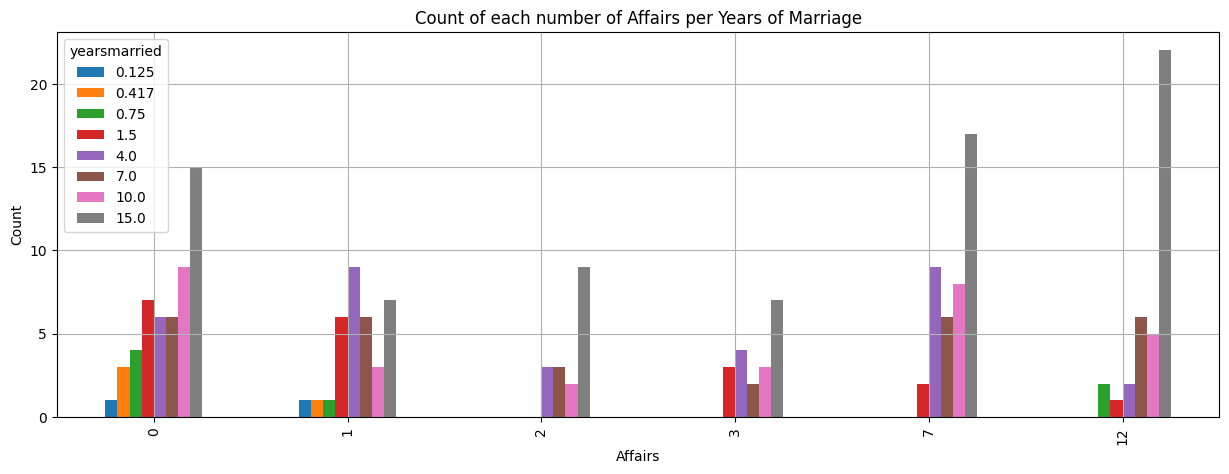

In [11]:
# Visualize affairs by years married
age_vs_affairs= pd.crosstab(index = df['extramarital_affairs'], columns = df['yearsmarried'])
age_vs_affairs.plot(kind='bar', figsize=(15,5), xlabel='Affairs', ylabel='Count', grid=True, title='Count of each number of Affairs per Years of Marriage')

<Axes: title={'center': 'Count of each number of Affairs per Religiousness Level'}, xlabel='Affairs', ylabel='Count'>

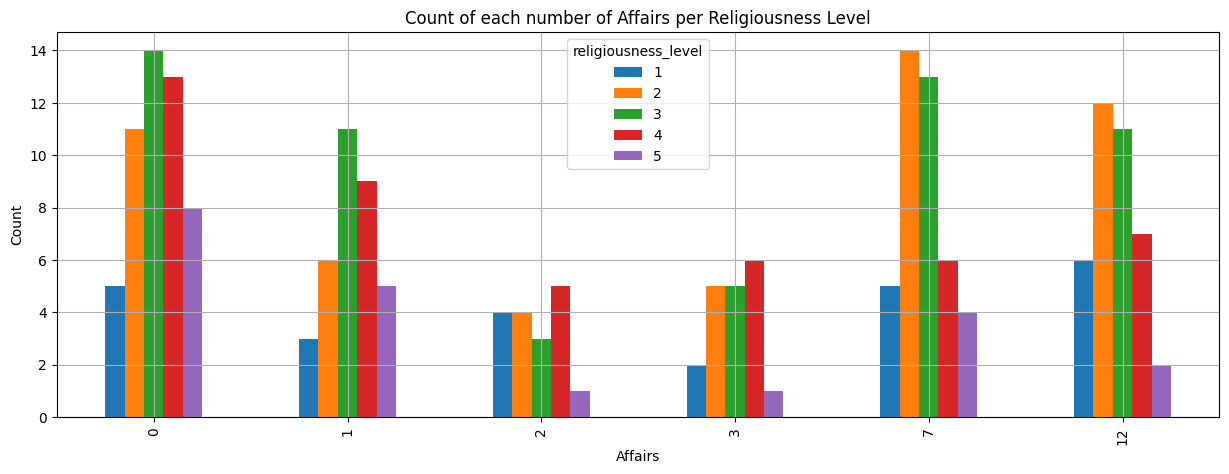

In [12]:
# Visualize affairs by religiousness_level
age_vs_affairs= pd.crosstab(index = df['extramarital_affairs'], columns = df['religiousness_level'])
age_vs_affairs.plot(kind='bar', figsize=(15,5), xlabel='Affairs', ylabel='Count', grid=True, title='Count of each number of Affairs per Religiousness Level')

In [13]:
# Separate Data
label = df['extramarital_affairs']
features = df.drop('extramarital_affairs', axis=1)

# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [14]:
# Standardize Data
from sklearn.preprocessing import StandardScaler
scaler_X_train = StandardScaler()
scaler_X_test = StandardScaler()

X_train = scaler_X_train.fit_transform(X_train)
X_test = scaler_X_test.fit_transform(X_test)

# change y labels to float64
y_train = tf.cast(y_train, dtype=tf.float64)
y_test = tf.cast(y_test, dtype=tf.float64)

X_train.shape, X_train.dtype, X_test.shape, X_test.dtype, y_train.shape, y_train.dtype, y_test.shape, y_test.dtype

((160, 8),
 dtype('float64'),
 (41, 8),
 dtype('float64'),
 TensorShape([160]),
 tf.float64,
 TensorShape([41]),
 tf.float64)

In [15]:
from keras import Sequential
from keras.layers import InputLayer, Dense
from keras.metrics import R2Score, MeanSquaredError
from keras.losses import MeanAbsoluteError
from keras.optimizers import Adam

ANN = Sequential([
  InputLayer(shape = (8,)),
  Dense(units = 10, activation = 'relu'),
  Dense(units = 1)
])

ANN.compile(optimizer = Adam(), loss = MeanAbsoluteError(), metrics = [R2Score(), MeanSquaredError()])

training = ANN.fit(X_train, y_train, epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6015 - mean_squared_error: 41.3986 - r2_score: -0.9521  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 4.8660 - mean_squared_error: 43.9630 - r2_score: -1.0533
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6600 - mean_squared_error: 40.9978 - r2_score: -0.9994 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0670 - mean_squared_error: 33.6176 - r2_score: -0.8698 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 4.6169 - mean_squared_error: 40.1316 - r2_score: -1.0033  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2561 - mean_squared_error: 36.7980 - r2_score: -0.8434 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3745 - mean_squared_error: 37.0362 - r2_score: -0.8922 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7548 - mean_squared_error: 42.1060 - r2_score: -0.9731 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1776 - mean_squared

In [16]:
## Testing on sklearn models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR_predictions = LR.predict(X_test)
LR_r2 = r2_score(y_pred=LR_predictions, y_true=y_test)
print(f'Linear Regression => R2 Score: {LR_r2:.2f}')

# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
tree_r2 = r2_score(y_pred=tree_predictions, y_true=y_test)
print(f'Decision Tree => R2 Score: {tree_r2:.2f}')

# Random Forest
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)
forest_r2 = r2_score(y_pred=forest_predictions, y_true=y_test)
print(f'Random Forest => R2 Score: {forest_r2:.2f}')

# Support Vector RBF Kernel
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
svr_predictions = svr.predict(X_test)
svr_r2 = r2_score(y_pred=svr_predictions, y_true=y_test)
print(f'svr_rbf => R2 Score: {svr_r2:.2f}')

Linear Regression => R2 Score: 0.22
Decision Tree => R2 Score: -0.72
Random Forest => R2 Score: 0.36
svr_rbf => R2 Score: 0.28


<Axes: >

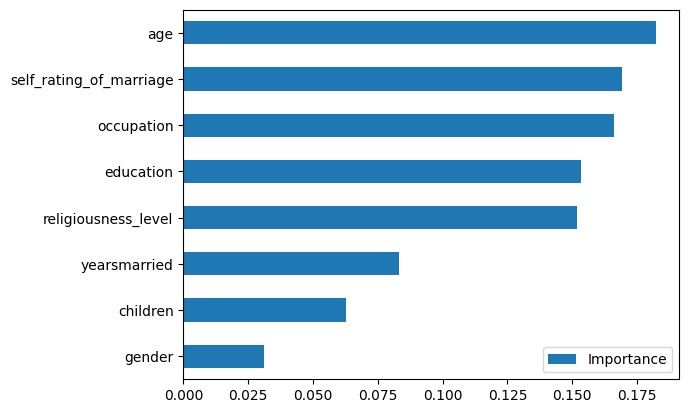

In [37]:
# Plot feature importance for tree
new = pd.DataFrame({'Importance': tree.feature_importances_}, index=features.columns)
new.sort_values(by='Importance', ascending=True, inplace=True)
new.plot(kind='barh', rot=0)

<Axes: >

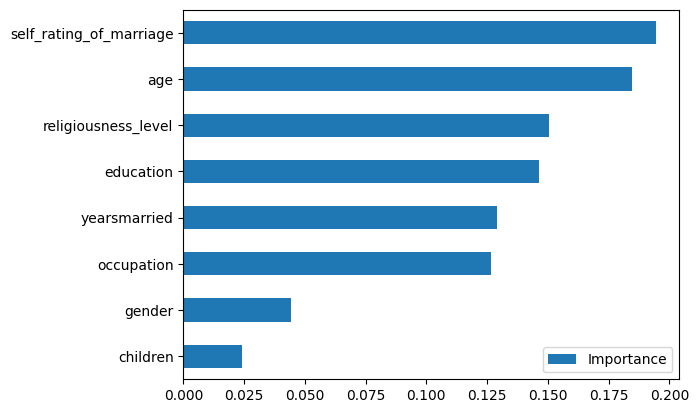

In [38]:
# Plot feature importance for forest
new = pd.DataFrame({'Importance': forest.feature_importances_}, index=features.columns)
new.sort_values(by='Importance', ascending=True, inplace=True)
new.plot(kind='barh', rot=0)